In [3]:
from typing import List, Tuple

import click

from hamilton import driver
import functions
from hamilton.execution import executors
import pandas as pd

/Users/elijahbenizzy/.pyenv/versions/3.9.10/envs/hamilton/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [8]:
# TODO -- delete
github_api_key="..."
repositories=[
    'dagworks-inc/hamilton',
    'stitchfix/hamilton'
]

In [9]:
dr = driver.Builder() \
        .enable_dynamic_execution(allow_experimental_mode=True) \
        .with_modules(functions) \
        .with_remote_executor(executors.MultiThreadingExecutor(max_tasks=10)) \
        .build()

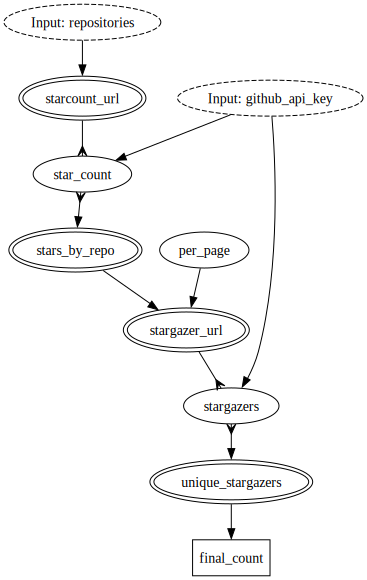

In [10]:
dr.visualize_execution(
        ['final_count'], None, {}, inputs={
            'github_api_key': github_api_key,
            'repositories': list(repositories)})

In [11]:
df = dr.execute(['final_count', 'unique_stargazers'], inputs={'github_api_key': github_api_key,
                                                                 'repositories': list(repositories)})['unique_stargazers']

<Axes: title={'center': 'unique across dagworks-inc/hamilton,stitchfix/hamilton'}, xlabel='starred_at'>

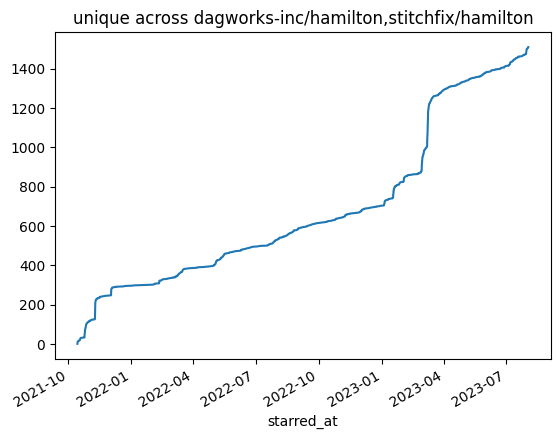

In [12]:
df['to_sum'] = 1
df.set_index('starred_at').sort_index().cumsum()['to_sum'].plot(title=f"unique across {','.join(repositories)}")

In [13]:
df

,starred_at,to_sum
user,,
0x26res,2023-07-26 08:58:25,1
0x2b3bfa0,2023-03-08 10:26:13,1
30lm32,2022-08-13 19:15:56,1
3zbumban,2023-03-26 21:35:57,1
AAbedrabbo,2023-03-31 12:01:25,1
...,...,...
zkan,2021-10-19 05:45:01,1
zouhairm,2022-10-25 19:56:32,1
zpencerguy,2023-05-31 16:11:07,1
